In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"


In [3]:
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df_raw.sample(10,random_state=2025)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11913,9277608,Soho 3BR/2BA Everything is just outside your d...,42047615,Jonathan & Nancy,Manhattan,Nolita,40.72347,-73.99302,Entire home/apt,650,3,130,2019-06-05,3.11,2,235
2206,1032127,Short Term Stay in Chelsea/MP NYC,5679237,Renee,Manhattan,Chelsea,40.74583,-74.00363,Entire home/apt,275,7,0,NaN,NaN,1,188
17213,13623700,Spacious and Quiet Gramercy 1 Bedroom,21656569,Alana,Manhattan,Gramercy,40.73577,-73.98057,Entire home/apt,275,5,0,NaN,NaN,1,0
14889,11817955,Artist's Loft - South Park Slope,4629474,Jonathan,Brooklyn,Sunset Park,40.66162,-73.99122,Entire home/apt,179,3,0,NaN,NaN,1,0
43064,33428068,Central Location: Excellent travelers bed,247189581,Helena,Brooklyn,Fort Greene,40.68528,-73.97285,Shared room,32,2,6,2019-06-06,1.78,5,31
449,158290,Clinton Hill + Free Coffee = #smile,759583,Pepe,Brooklyn,Clinton Hill,40.68288,-73.96024,Private room,75,3,43,2019-05-20,0.44,2,365
25988,20754847,Super Comfy Double Bed in new 2 story house!,23861295,Beth,Brooklyn,East Flatbush,40.64350,-73.94011,Private room,47,1,4,2019-06-23,2.73,1,63
7675,5792144,Wall Street luxury short term stay,15175443,Val,Manhattan,Financial District,40.70471,-74.00817,Private room,150,3,2,2015-07-28,0.04,1,0
13069,9894820,Upper East Side Manhattan 2 Bedroom,50894847,Aidan,Manhattan,Upper East Side,40.76920,-73.96754,Entire home/apt,149,1,1,2015-12-19,0.02,1,0
21264,16897611,"1 Bedroom in nice, clean LES apartment",112763616,Gaurav,Manhattan,Lower East Side,40.71873,-73.99073,Private room,95,1,3,2017-09-27,0.13,1,0


In [5]:
df_baking = df_raw.copy()
df_baking = df_baking.drop(columns=["id","name","host_id","host_name","neighbourhood","last_review"])
df_baking["neighbourhood_group"] = df_baking["neighbourhood_group"].astype("category")
df_baking["room_type"] = df_baking["room_type"].astype("category")
df_baking = df_baking.dropna()
df = df_baking.copy()

In [6]:
display(df.describe(include='number').T)
display(df.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
latitude,38843.0,40.728134,0.054990,40.50641,40.68864,40.72171,40.76299,40.91306
longitude,38843.0,-73.951148,0.046695,-74.24442,-73.98247,-73.95480,-73.93502,-73.71299
price,38843.0,142.317947,196.945624,0.00000,69.00000,101.00000,170.00000,10000.00000
minimum_nights,38843.0,5.868059,17.384784,1.00000,1.00000,2.00000,4.00000,1250.00000
number_of_reviews,38843.0,29.297557,48.186374,1.00000,3.00000,9.00000,33.00000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.02000,58.50000
calculated_host_listings_count,38843.0,5.164457,26.295665,1.00000,1.00000,1.00000,2.00000,327.00000
availability_365,38843.0,114.882888,129.543636,0.00000,0.00000,55.00000,229.00000,365.00000


,count,unique,top,freq
neighbourhood_group,38843,5,Manhattan,16632
room_type,38843,3,Entire home/apt,20332


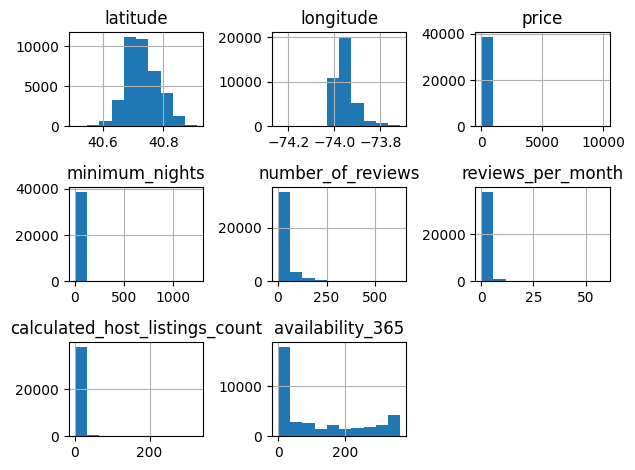

In [7]:
df.hist()
plt.tight_layout()
plt.show()

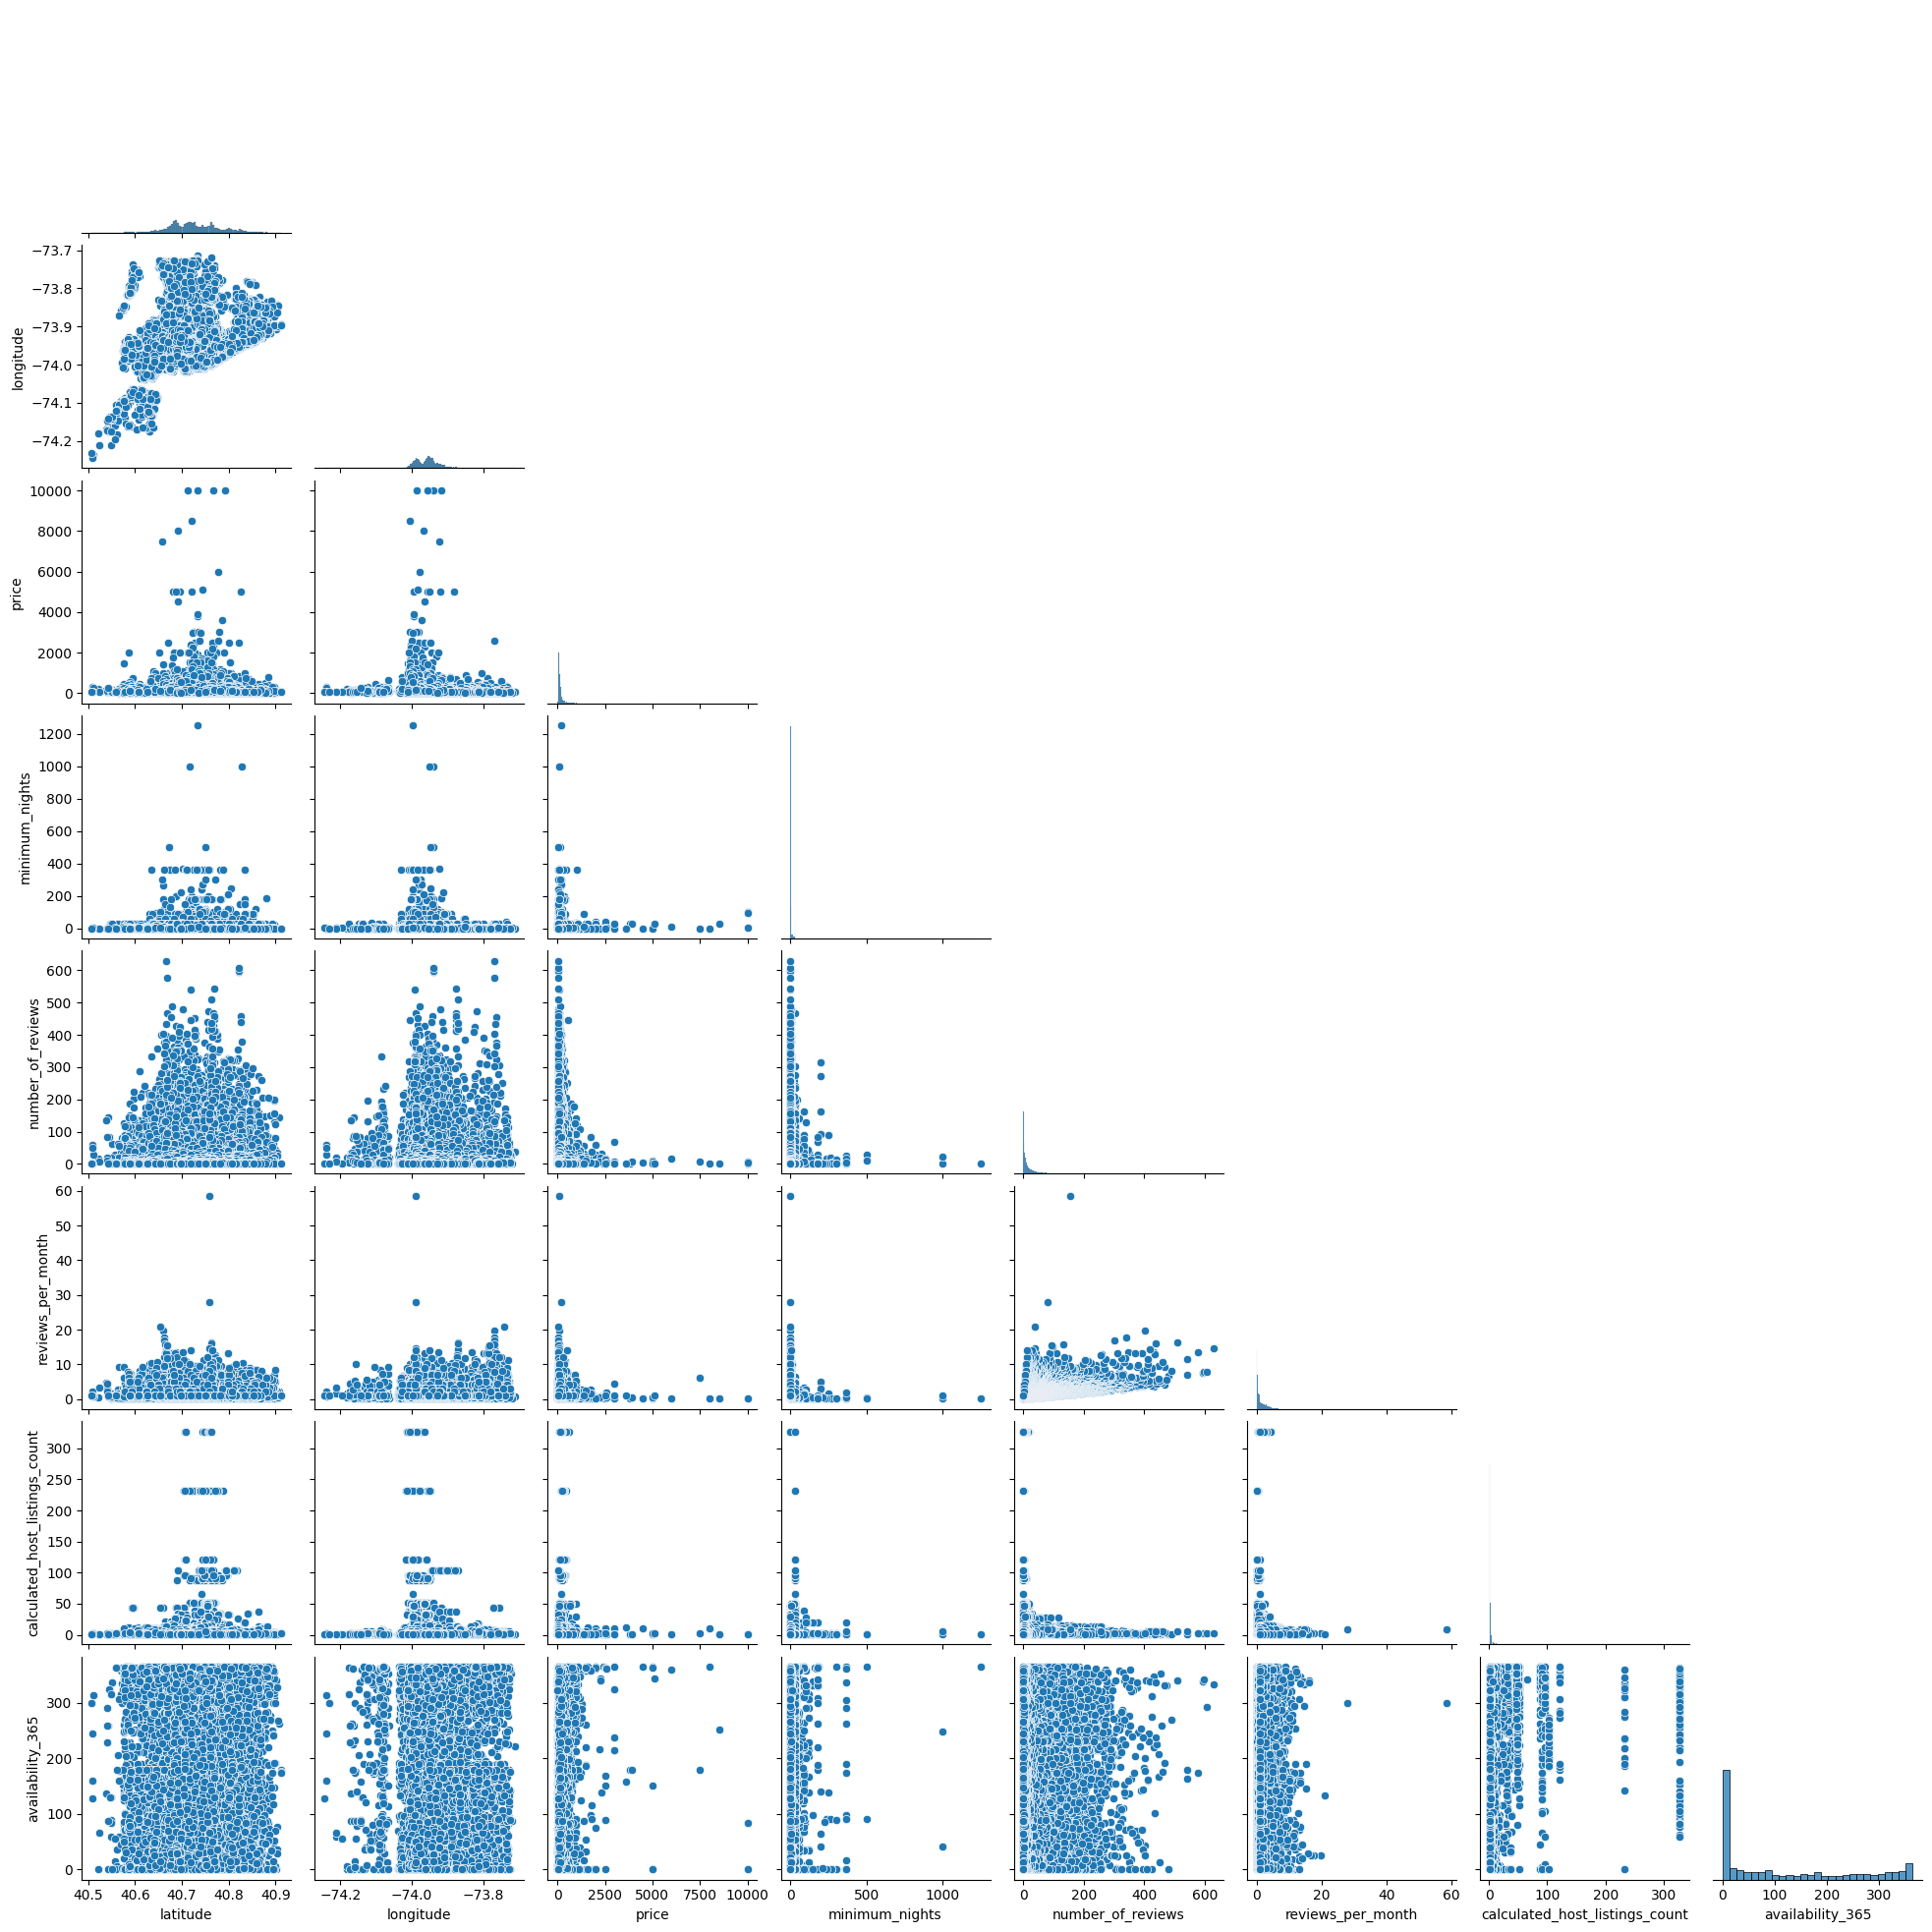

In [8]:
sns.pairplot(data=df,corner=True)
plt.show()

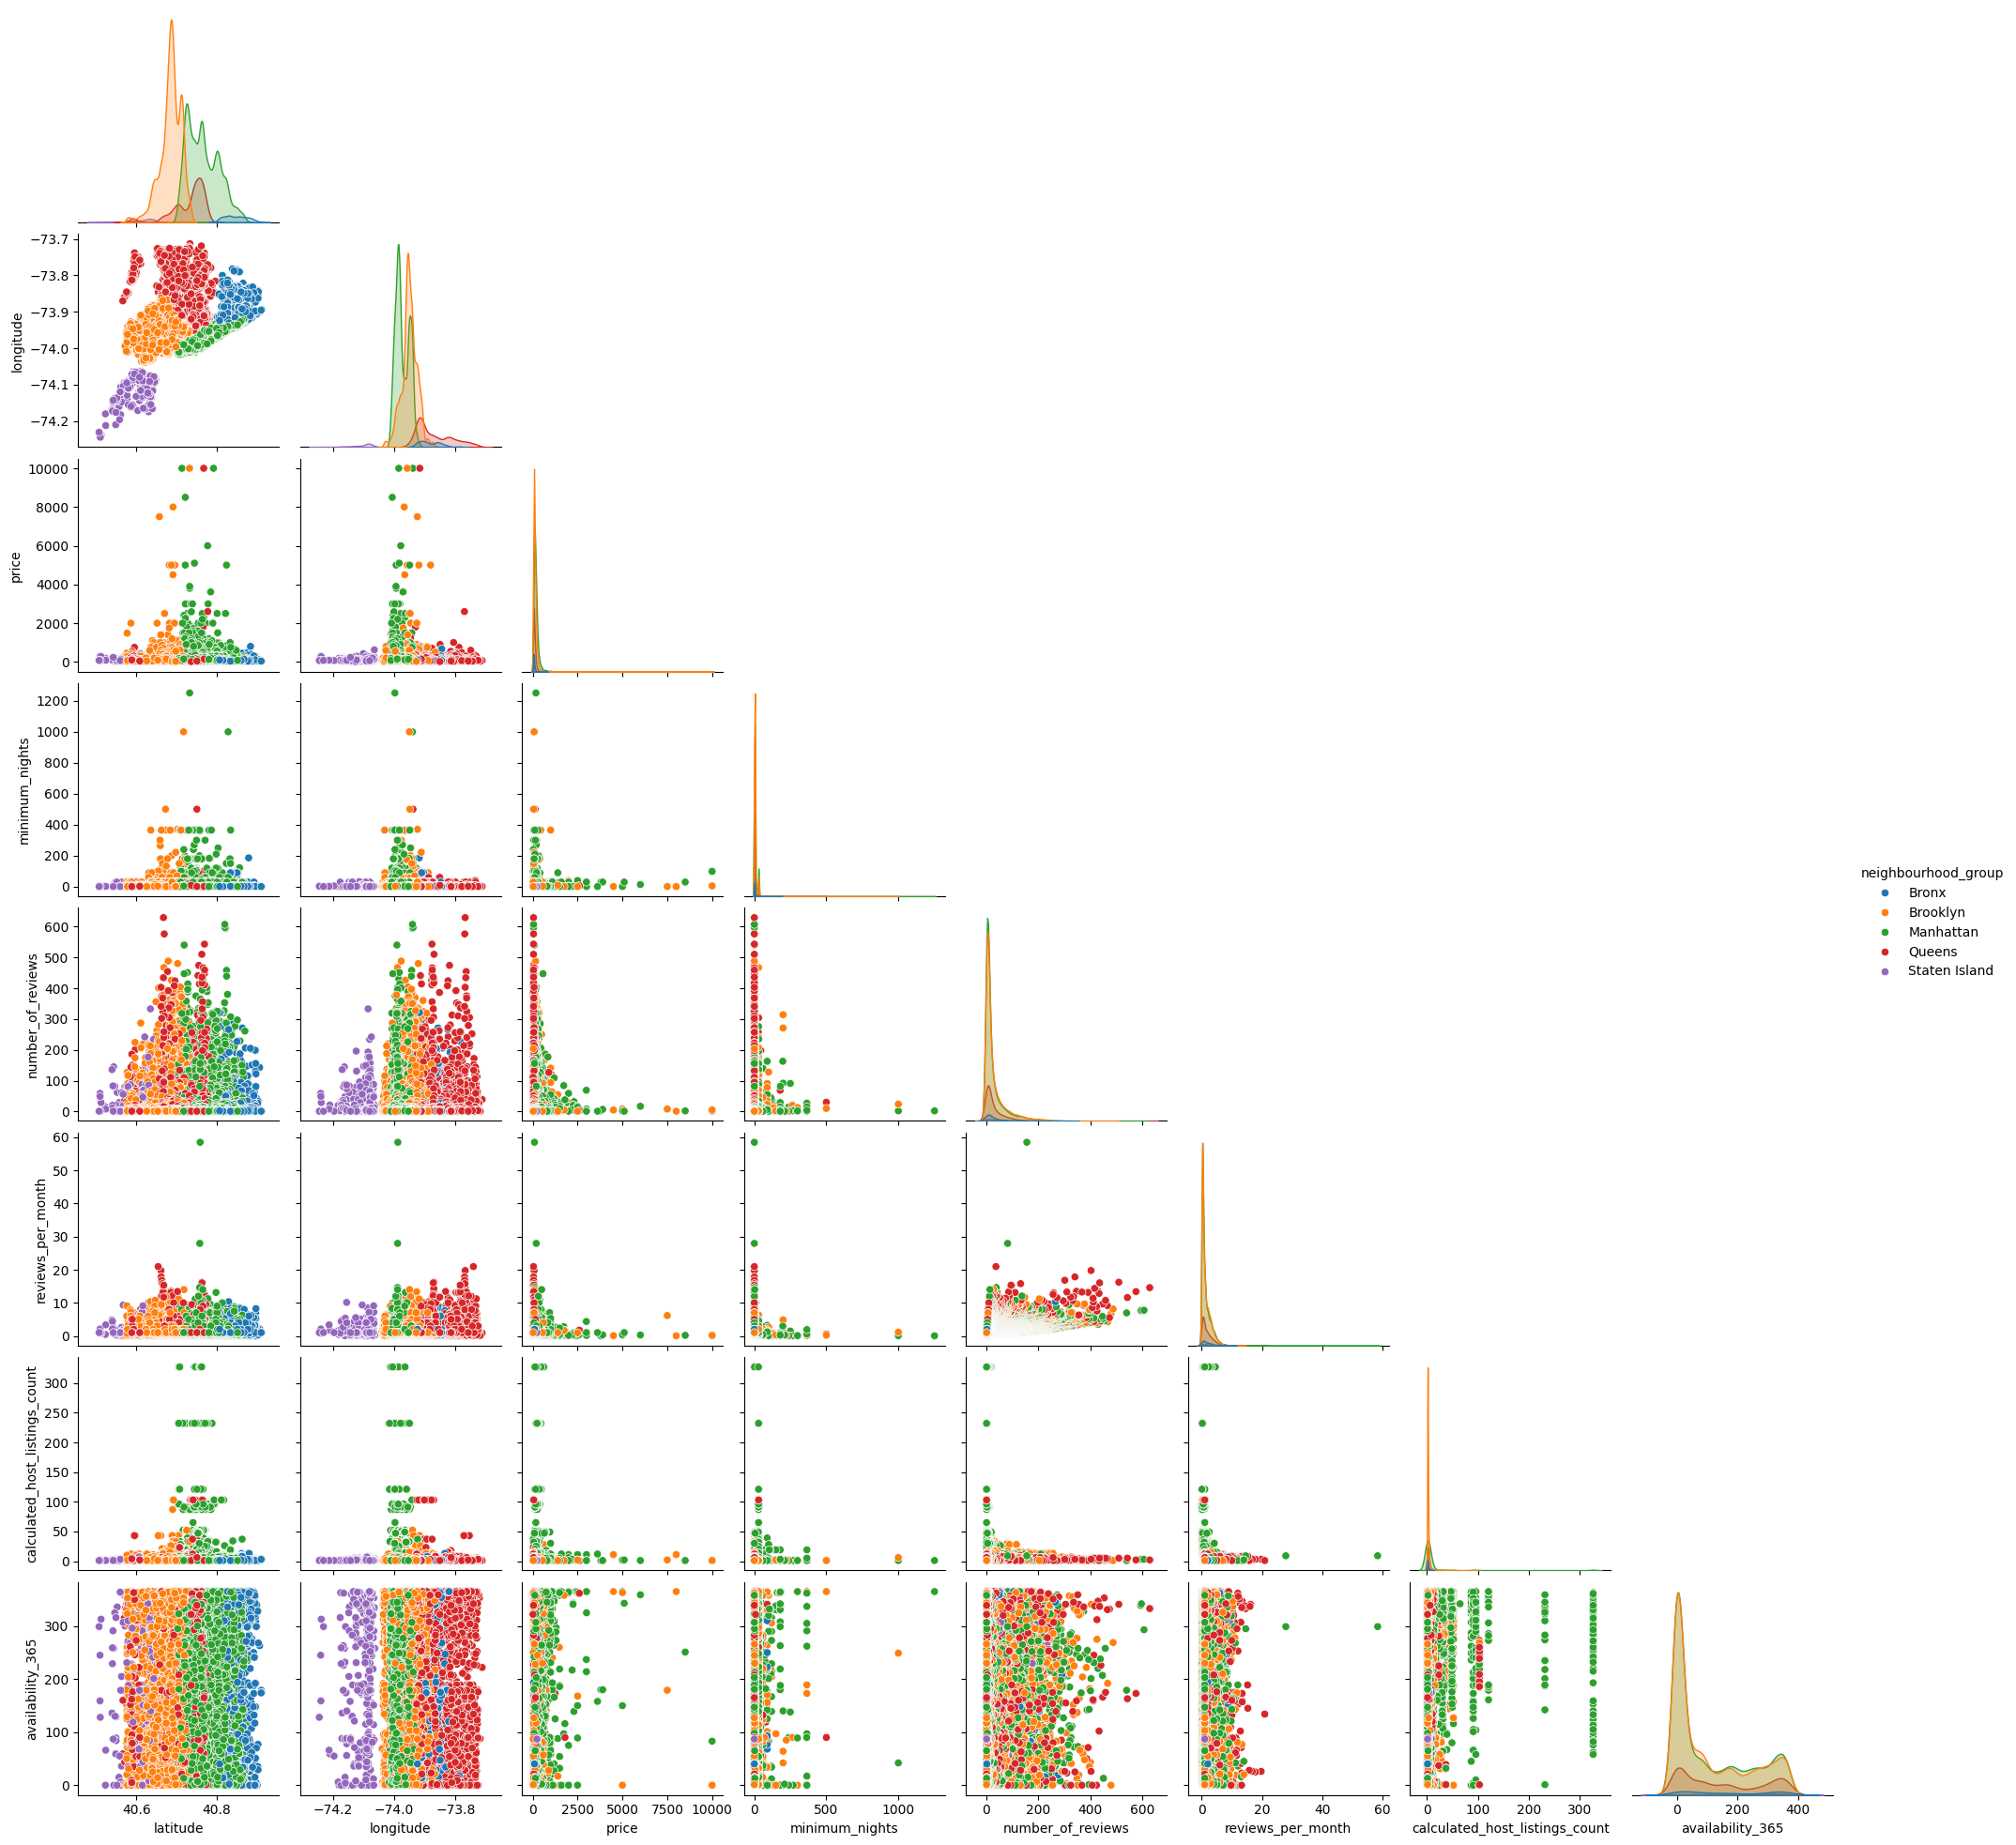

In [9]:
sns.pairplot(data=df,hue="neighbourhood_group",corner=True)
plt.show()

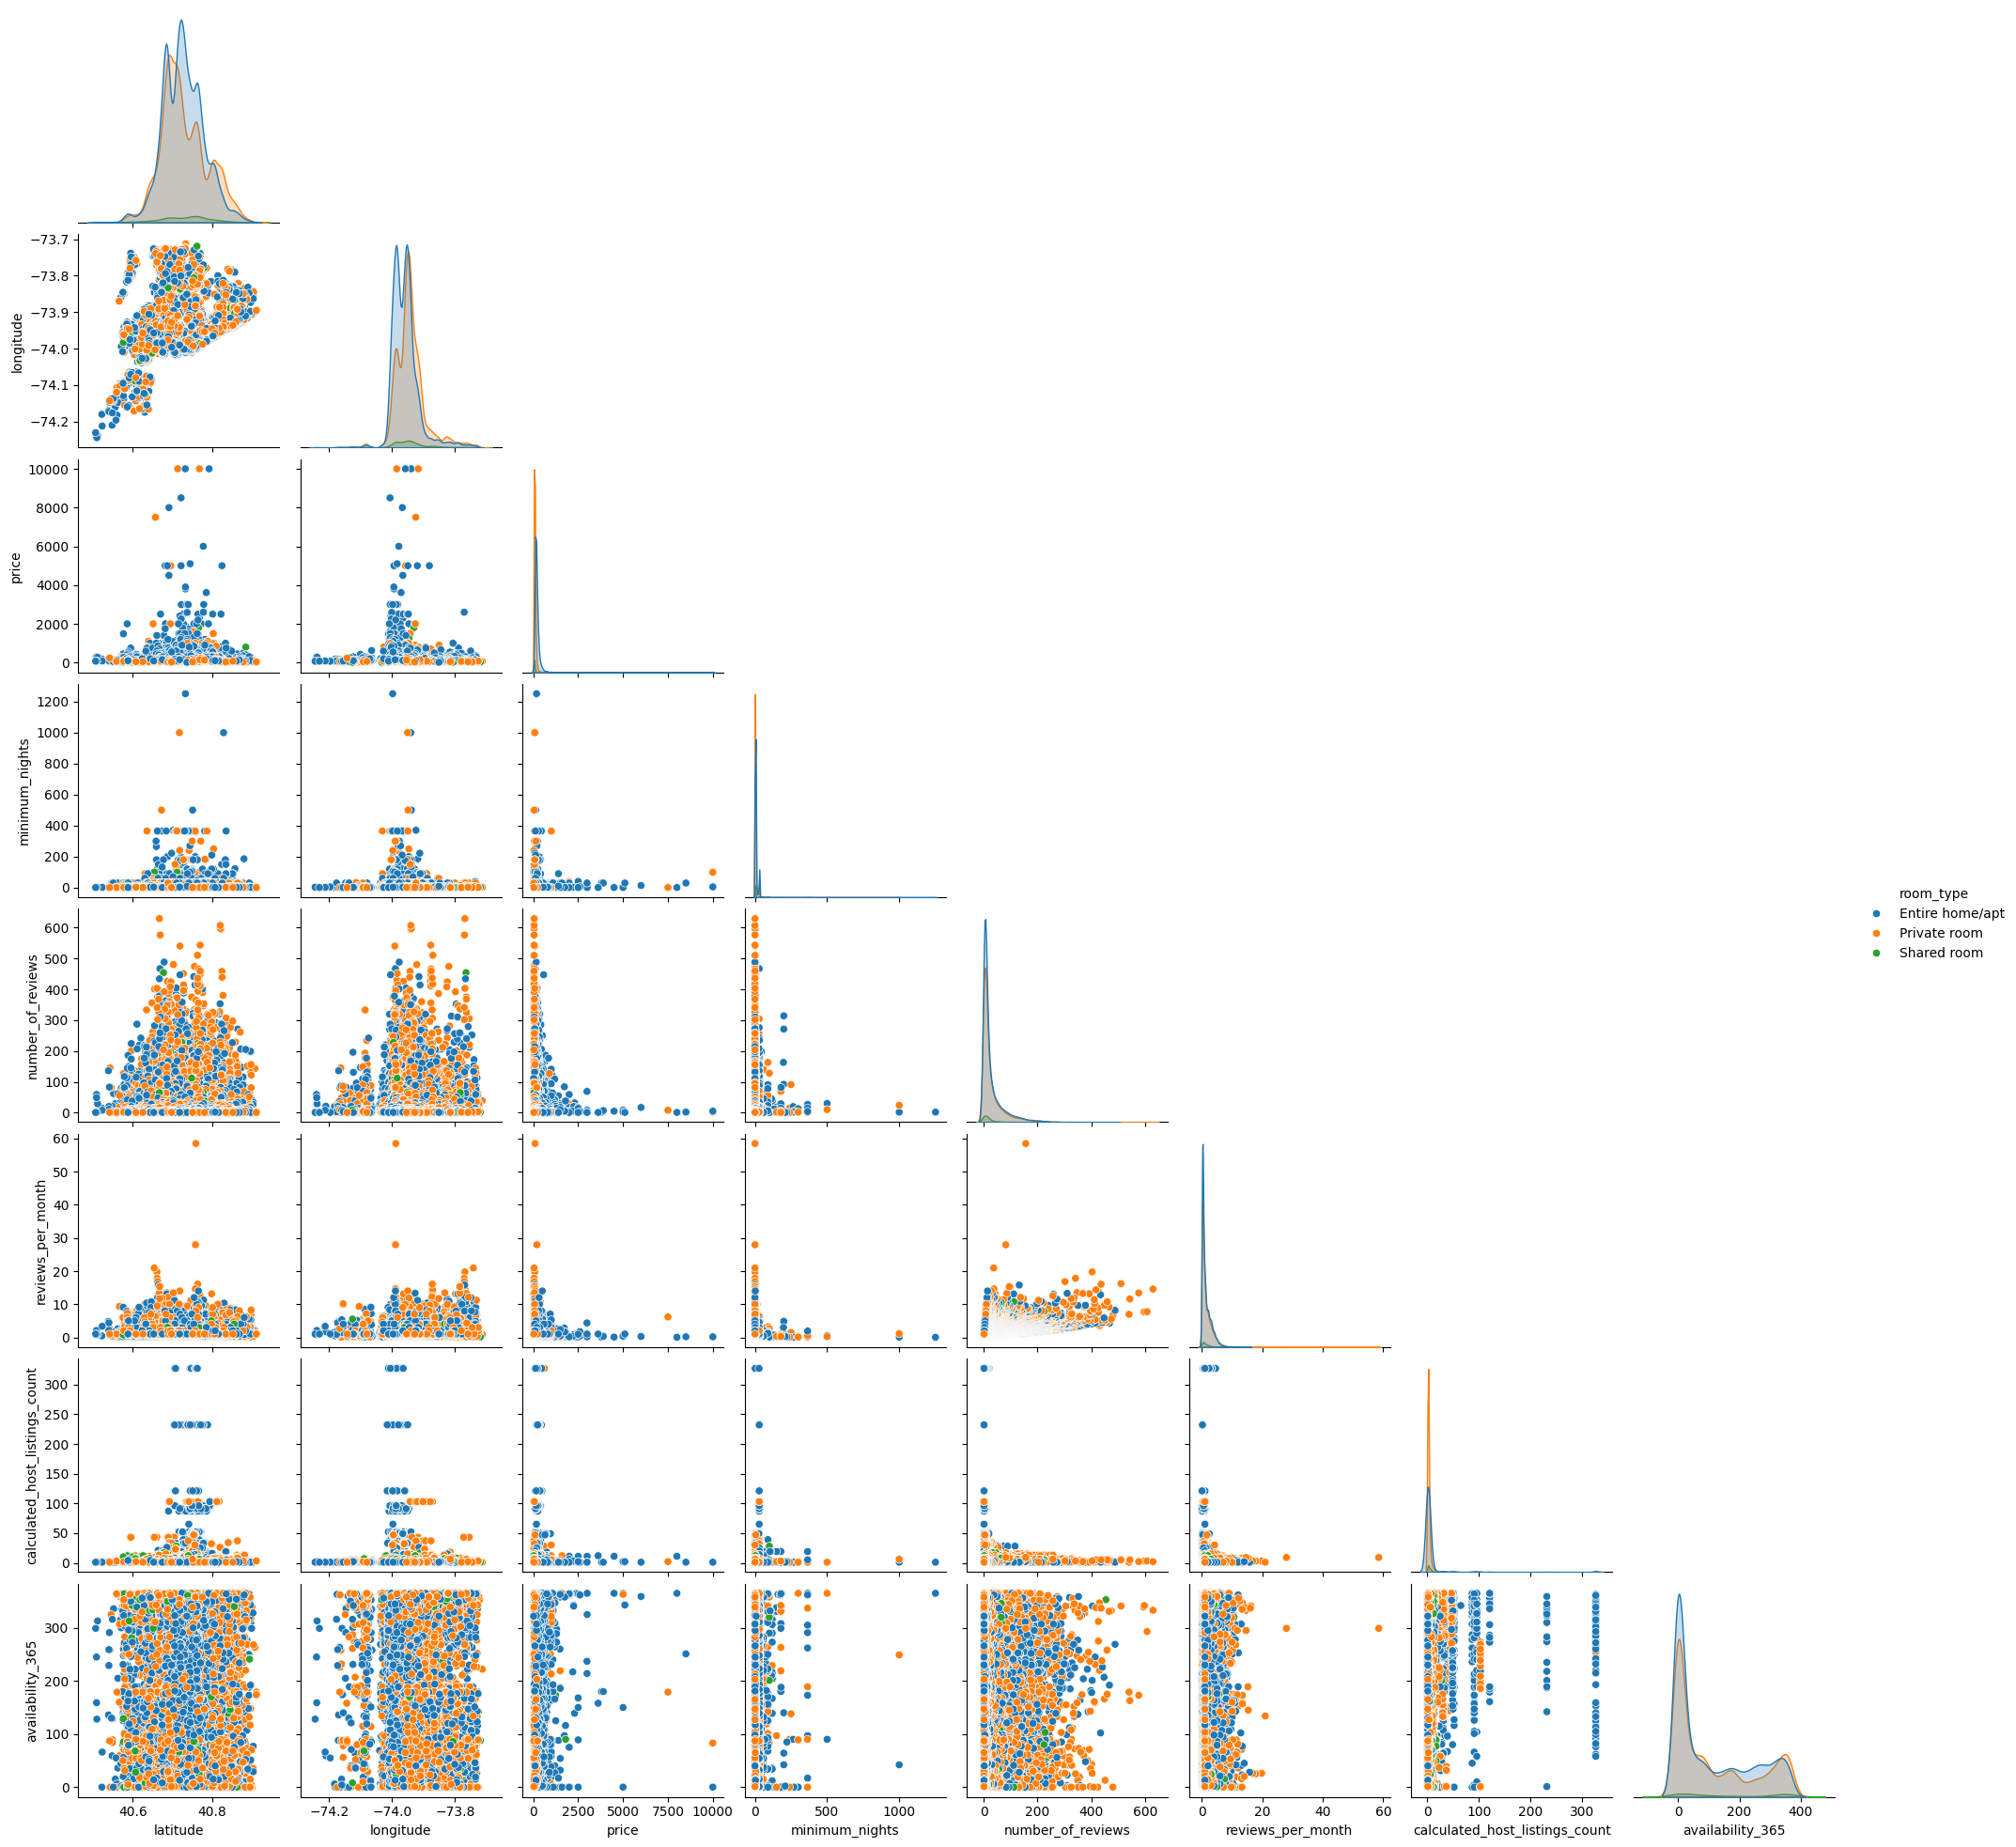

In [10]:
sns.pairplot(data=df,hue="room_type",corner=True)
plt.show()

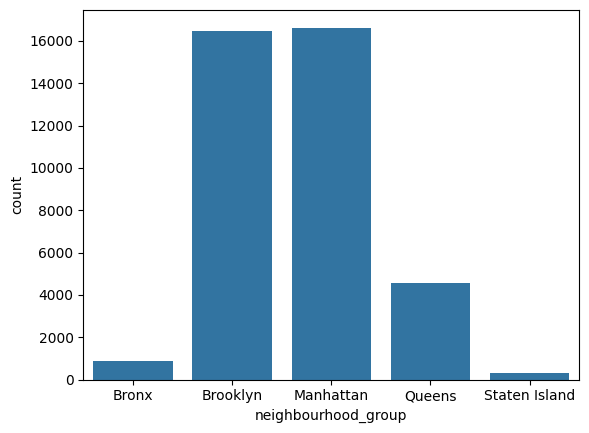

In [11]:
sns.countplot(df, x='neighbourhood_group')
plt.show()

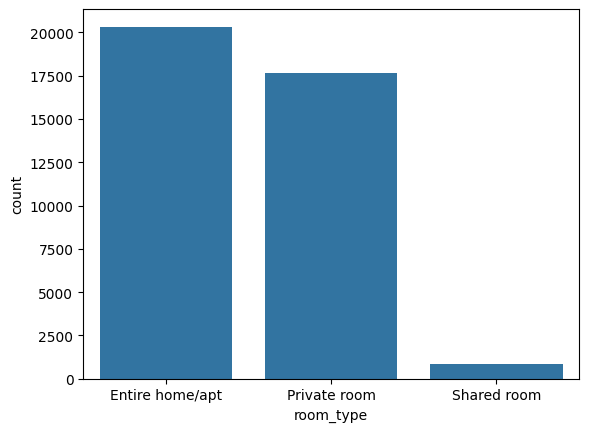

In [12]:
sns.countplot(df, x='room_type')
plt.show()

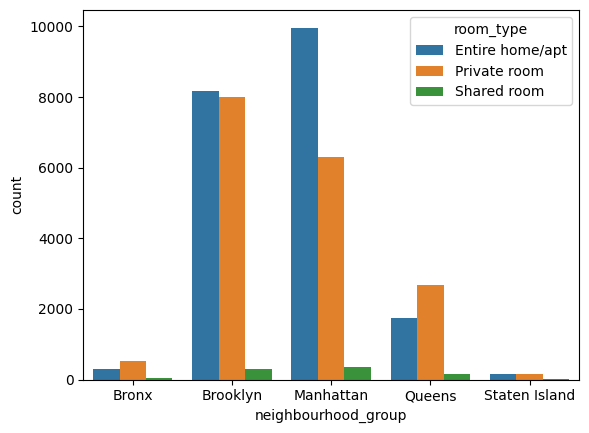

In [13]:
sns.countplot(df, x='neighbourhood_group', hue='room_type')
plt.show()